# Name: Parth Kothari
# Course: MSc
# Roll number: 2303121012

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

In [4]:
def plotter_map(filepath,name):
    f = open(filepath) #path to map
    N  = np.fromfile(f, count=3, dtype='uint64')
    N1,N2,N3 = N
    print(N1,N2,N3)
    l = np.fromfile(f, count=1, dtype='float32')
    print(l)
    data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
    f.close()
    data = np.reshape(data, (N1,N2,N3), order='C')
    index = 15 #x-y slice
    image = np.log10(data[0:128,0:128,index])
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title(f'{name} at redshift {filepath[-5]}')
    im = ax.imshow(image, interpolation='none', origin='lower', cmap='magma')
    fig.colorbar(im, ax=ax, label='$log(1+\delta)$')
    plt.show()


64 64 64
[0.28]


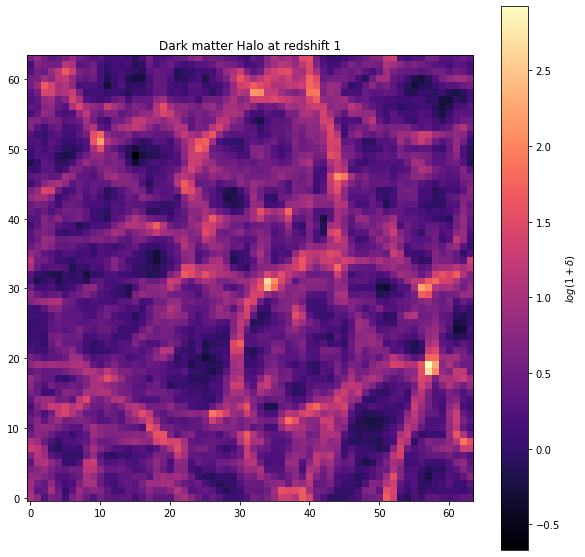

64 64 64
[0.28]


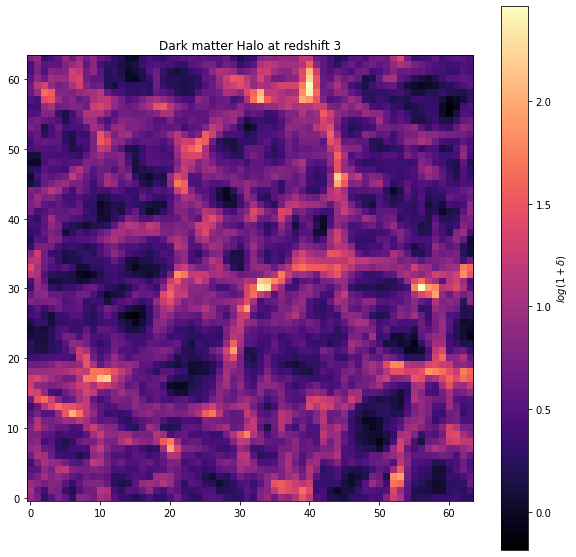

64 64 64
[0.28]


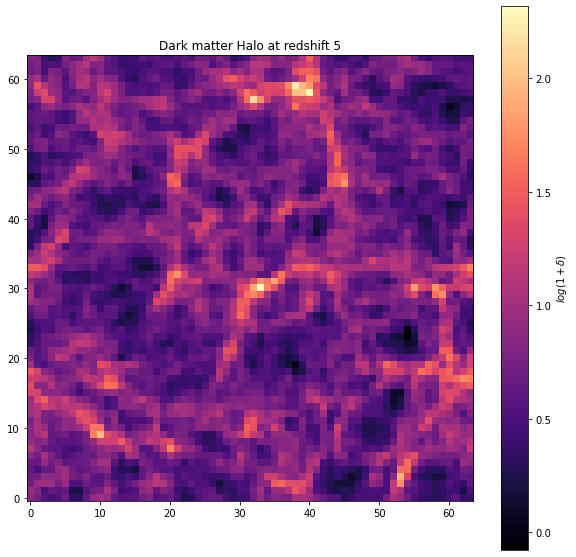

64 64 64
[0.28]


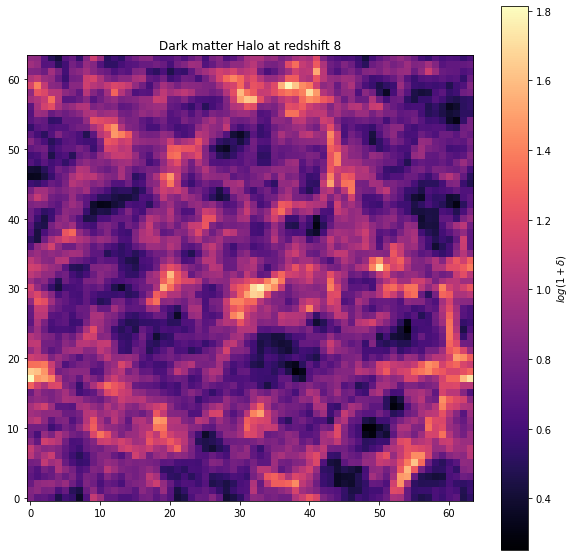

64 64 64
[0.28]


<ipython-input-4-f2d975e9f591>:12: RuntimeWarning: divide by zero encountered in log10
  image = np.log10(data[0:128,0:128,index])


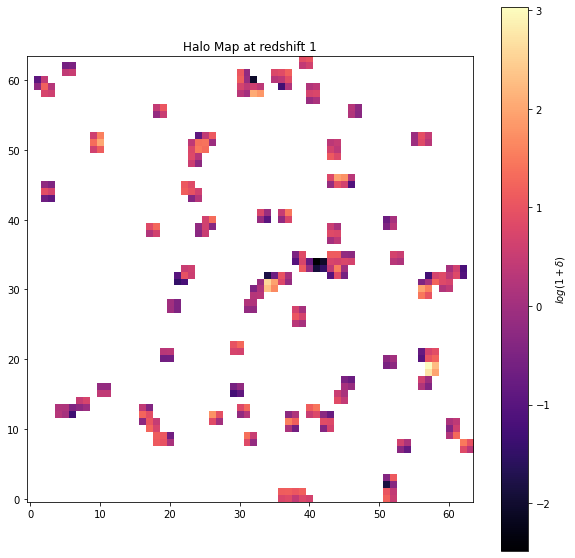

64 64 64
[0.28]


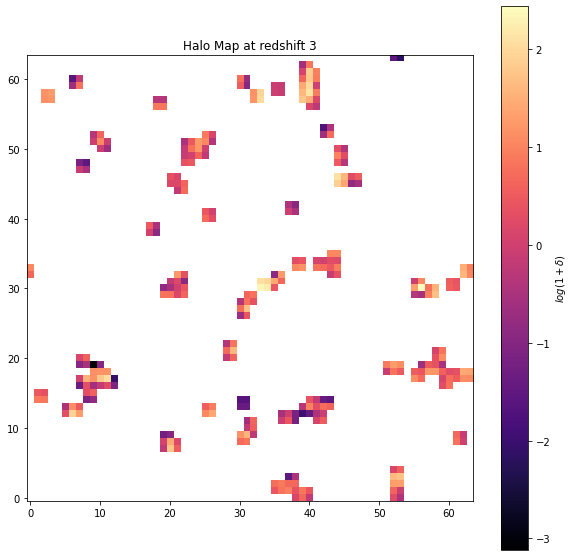

64 64 64
[0.28]


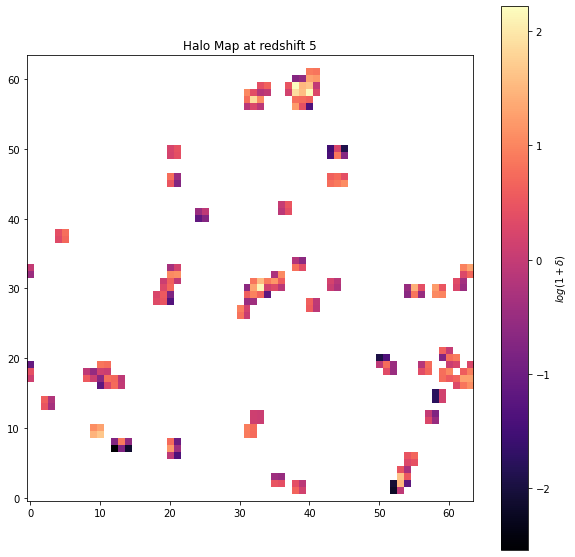

64 64 64
[0.28]


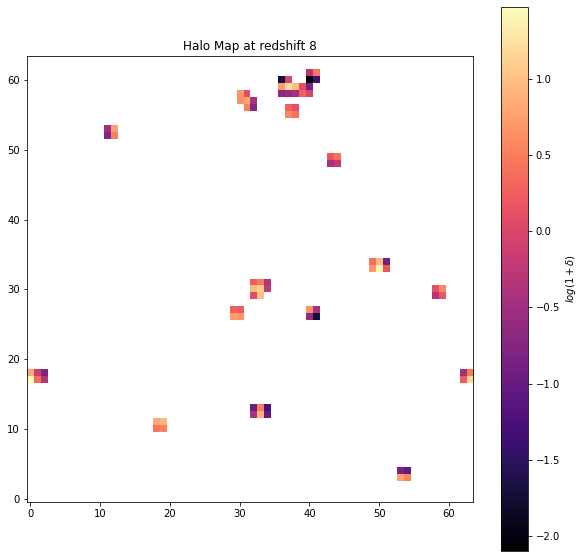

In [5]:
Dark_matter_512_standard= ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/DM_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/DM_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/DM_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/DM_map_8.000']
Halo_map_512_standard = ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/Halo_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/Halo_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/Halo_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/Halo_map_8.000']
for i in Dark_matter_512_standard:
    plotter_map(i,'Dark matter Halo')
for j in Halo_map_512_standard:
    plotter_map(j,'Halo Map')

In [6]:
def Power_spectrum(path_D,path_H):

    # For density
    data_D = np.genfromtxt(path_D).transpose()
    k_mode_D = data_D[0]
    Power_D = data_D[1]
    Bins_D = data_D[4]

    # For halo
    data_H = np.genfromtxt(path_H).transpose()
    k_mode_H = data_H[0]
    Power_H = data_H[1]
    Bins_H = data_H[4]

    # For Bias
    p = Power_H / Power_D

    # Plotting
    plt.figure(figsize=(21, 6)) 

    plt.subplot(1, 3, 1)
    plt.plot(k_mode_D, Power_D)
    plt.errorbar(k_mode_D,Power_D,Power_D/np.sqrt(Bins_D))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_D[-1]} for Density of dark matter")
    
    plt.subplot(1, 3, 2)
    plt.plot(k_mode_H, Power_H)
    plt.errorbar(k_mode_H,Power_H,Power_H/np.sqrt(Bins_H))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_H[-1]} for Dark matter Halo")

    plt.subplot(1, 3, 3)
    plt.plot(k_mode_D, p)
    plt.xlabel("k mode")
    plt.ylabel("Power bias")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum bias at $z = ${path_D[-1]}")

    plt.tight_layout()  
    plt.show()

## Power spectrum for 10k bins

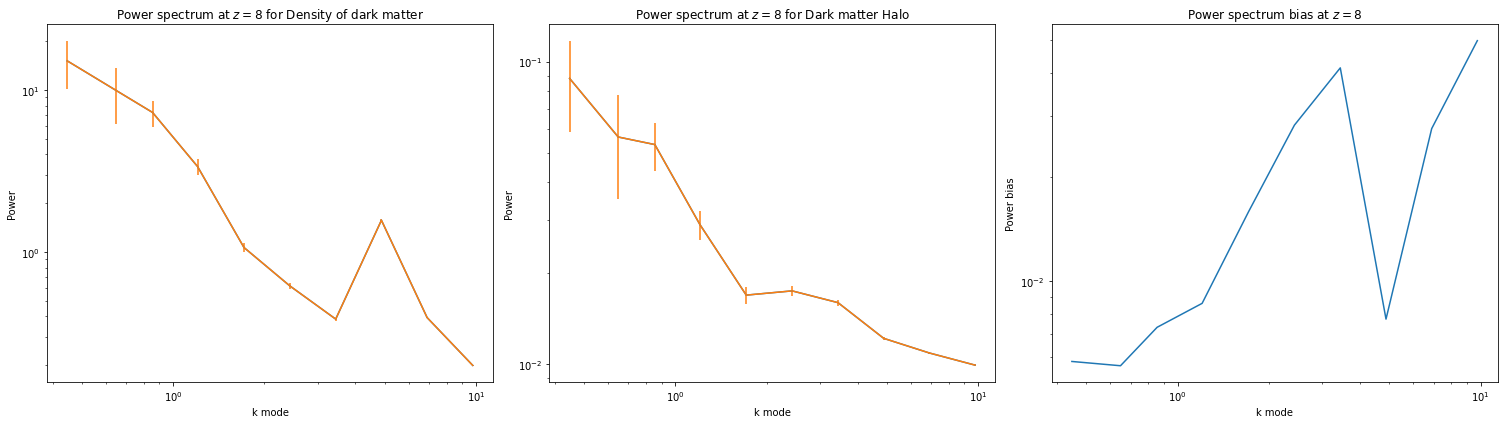

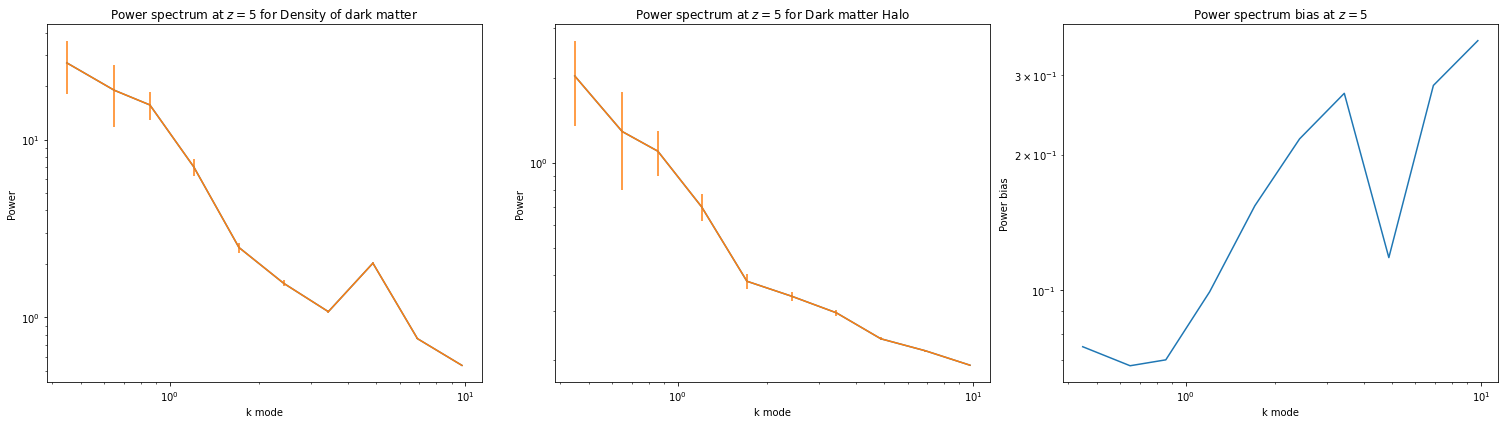

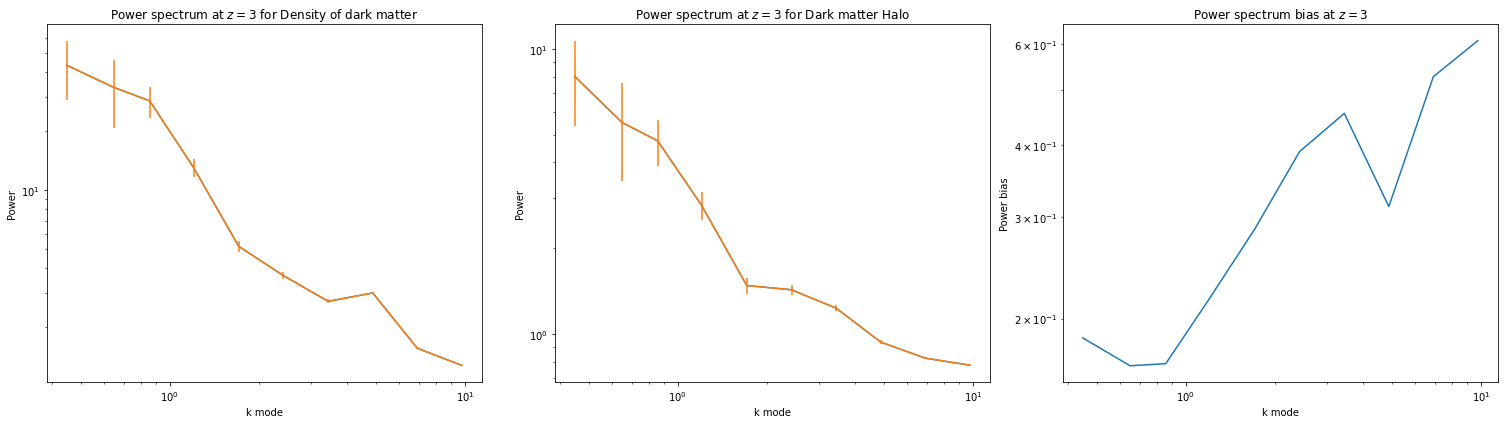

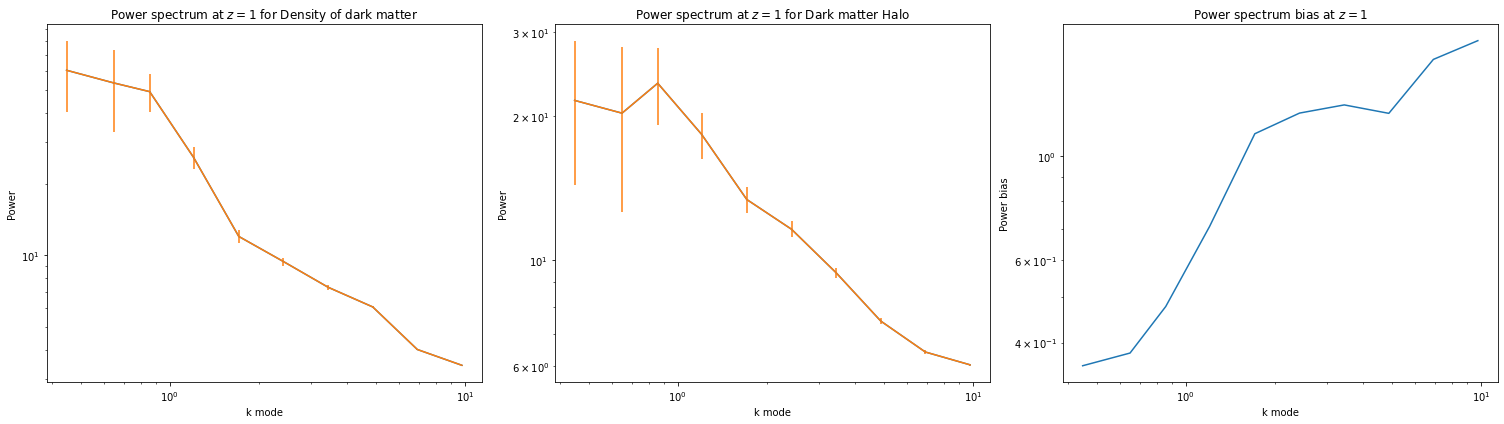

In [7]:
D11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_DM_1"
H11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_HM_1"
D33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_DM_3"
H33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_HM_3"
D55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_DM_5"
H55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_HM_5"
D88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_DM_8"
H88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/10k_PK_HM_8"

d1_512 = [D88_512,D55_512,D33_512,D11_512]
h1_512 = [H88_512,H55_512,H33_512,H11_512]

for i,j in zip(d1_512,h1_512):
    Power_spectrum(i,j)

## Power spectrum for 5k bins

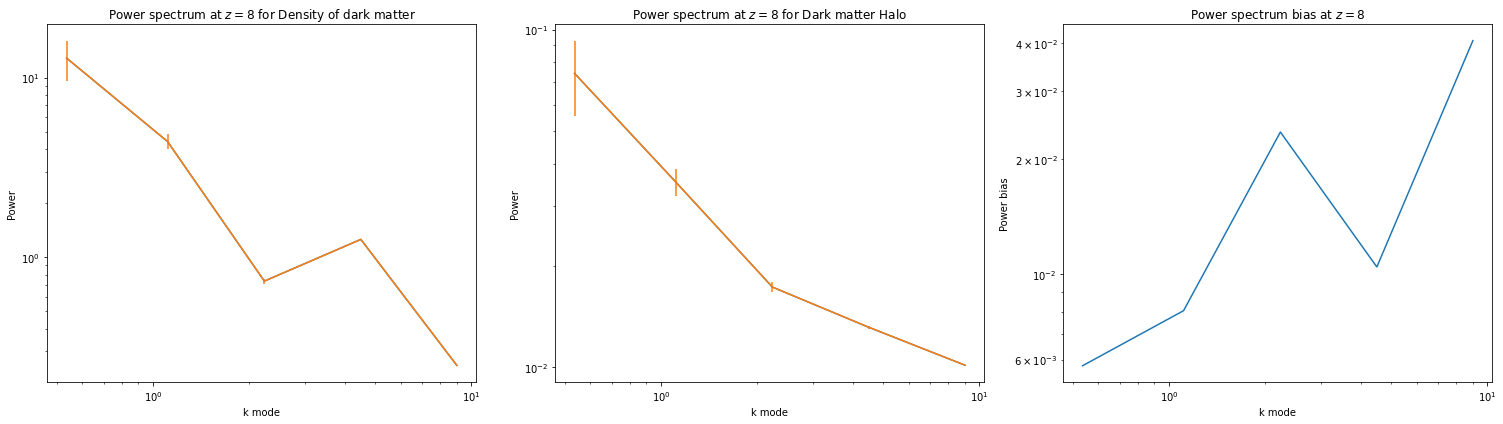

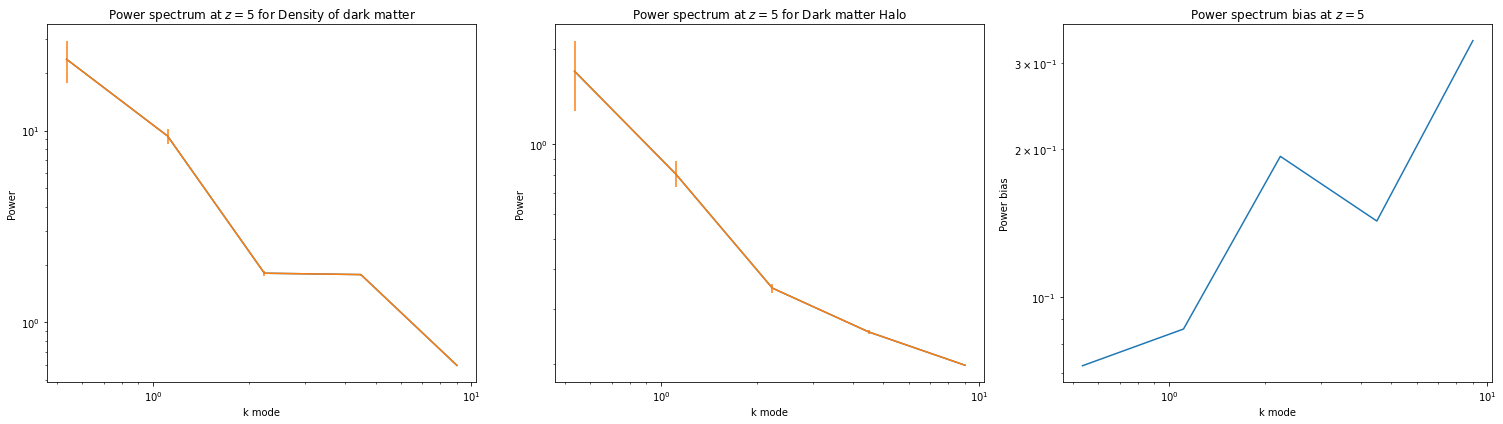

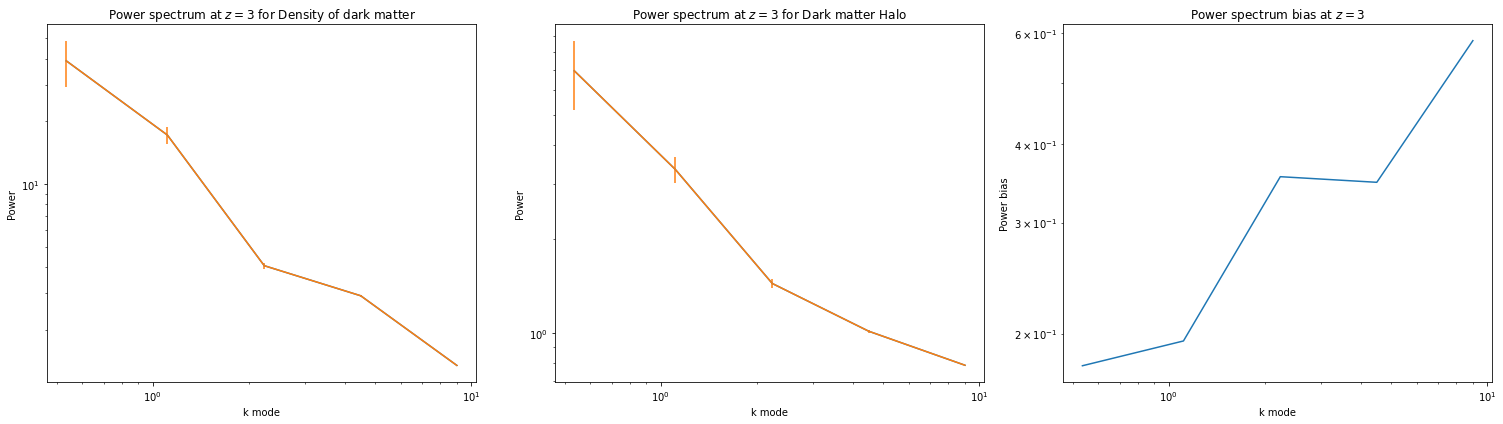

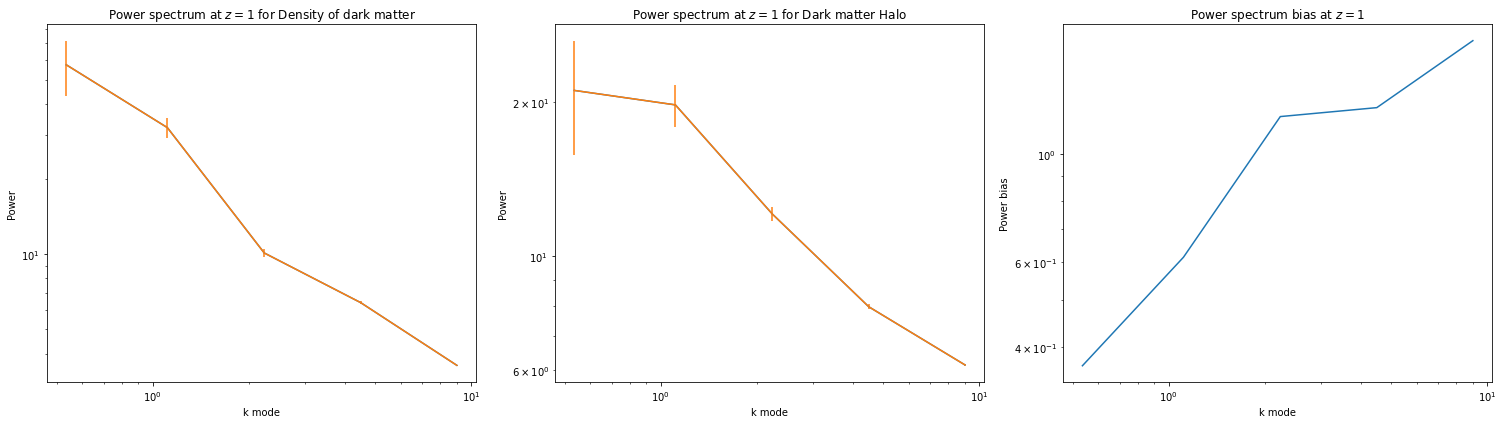

In [11]:
D11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_DM_1"
H11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_HM_1"
D33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_DM_3"
H33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_HM_3"
D55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_DM_5"
H55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_HM_5"
D88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_DM_8"
H88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density_64_alternate_model_256/5k_PK_HM_8"

d1_512 = [D88_512,D55_512,D33_512,D11_512]
h1_512 = [H88_512,H55_512,H33_512,H11_512]

for i,j in zip(d1_512,h1_512):
    Power_spectrum(i,j)